In [30]:
# Loading mnist dataset
from mnist.loader import MNIST

mndata = MNIST('mnist_data')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()



In [31]:
import numpy as np
from keras.utils import np_utils
np.shape(X_test)

(10000, 784)

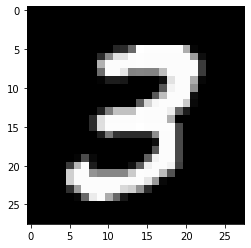

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [79]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(X_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])


In [ ]:
# Convert dataset to numpy array and outputs to categorical
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
# Function to split train set and validation set 1/6 randomly for each call
from sklearn.model_selection import train_test_split
from numpy import random

def train_valid_split(X_data, y_data):
    return train_test_split(X_data, y_data, test_size=0.166, random_state=random.randint(100), shuffle=True)


c) Optimizer evaluation:

Optimal Learning Rates for all optimizers was found by using -
lr = random.choice([1.0,0.1,0.01,0.001,0.0001]) and training the model 10 times with random sub_train and validation sets.
After obtaining optimal learning rate, the remaining hyper-parameters were tuned by training the model 10 times with different random sub_train and validation sets. This is shown below.

In [58]:
# Using 32U single layer model for optimizers evaluation and tuning hyper-parameters to report accuracy
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# For ADAM
accuracy_list = []

for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    b1=random.uniform(0.8,1)
    b2=random.uniform(0.990,1)
    batch_no = random.randint(35,100)
    print(f"Random values for beta_1, beta_2 and batch_size are: {b1}, {b2} and {batch_no}")
    # Learning rate for Adam has the optimal value 0.001
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=b1, beta_2=b2, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_no, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)

Random values for beta_1, beta_2 and batch_size are: 0.976221150238183, 0.9989042907844174 and 40
313/313 [==============================] - 1s 1ms/step - loss: 0.3038 - accuracy: 0.9298
Random values for beta_1, beta_2 and batch_size are: 0.9331641596755733, 0.9951318251038282 and 65
313/313 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.9337
Random values for beta_1, beta_2 and batch_size are: 0.8643752225613837, 0.9971608946010938 and 49
313/313 [==============================] - 1s 1ms/step - loss: 0.2852 - accuracy: 0.9252
Random values for beta_1, beta_2 and batch_size are: 0.9679402388784674, 0.9902852370529855 and 72
313/313 [==============================] - 1s 1ms/step - loss: 0.2727 - accuracy: 0.9350
Random values for beta_1, beta_2 and batch_size are: 0.9018317861334962, 0.992954707284092 and 65
313/313 [==============================] - 1s 1ms/step - loss: 0.2829 - accuracy: 0.9343
Random values for beta_1, beta_2 and batch_size are: 0.9703710

In [34]:
# For RMSProp
accuracy_list = []

for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    r=random.uniform(0.8,1)
    batch_no = random.randint(35,100)
    print(f"Random values for rho and batch_size are: {r} and {batch_no}")
    # Learning rate for RMSProp has the optimal value 0.001
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=r, momentum=0.0, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_no, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)

Random values for rho and batch_size are: 0.9962380849539331 and 49
313/313 [==============================] - 0s 944us/step - loss: 0.3772 - accuracy: 0.8974
Random values for rho and batch_size are: 0.8516611950595442 and 41
313/313 [==============================] - 0s 1ms/step - loss: 0.7423 - accuracy: 0.9035
Random values for rho and batch_size are: 0.8382874393539324 and 61
313/313 [==============================] - 0s 896us/step - loss: 0.5551 - accuracy: 0.9229
Random values for rho and batch_size are: 0.9289500832432762 and 57
313/313 [==============================] - 0s 920us/step - loss: 0.4143 - accuracy: 0.9336
Random values for rho and batch_size are: 0.9825210330277548 and 56
313/313 [==============================] - 0s 968us/step - loss: 0.3167 - accuracy: 0.9345
Random values for rho and batch_size are: 0.891681644332136 and 38
313/313 [==============================] - 0s 936us/step - loss: 0.5847 - accuracy: 0.9107
Random values for rho and batch_size are: 0.81551

In [42]:
# For SGD
accuracy_list = []

for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    batch_no = random.randint(35,100)
    print(f"Random value for batch_size is: {batch_no}")
    # Learning rate for SGD has the optimal value 0.001
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_no, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)

Random value for batch_size is: 71
313/313 [==============================] - 1s 3ms/step - loss: 0.7602 - accuracy: 0.8107
Random value for batch_size is: 83
313/313 [==============================] - 1s 3ms/step - loss: 0.9160 - accuracy: 0.7235
Random value for batch_size is: 46
313/313 [==============================] - 1s 3ms/step - loss: 0.8190 - accuracy: 0.7609
Random value for batch_size is: 58
313/313 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.8525
Random value for batch_size is: 69
313/313 [==============================] - 1s 2ms/step - loss: 0.6201 - accuracy: 0.8078
Random value for batch_size is: 79
313/313 [==============================] - 1s 3ms/step - loss: 0.6109 - accuracy: 0.8645
Random value for batch_size is: 89
313/313 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.8634
Random value for batch_size is: 69
313/313 [==============================] - 1s 3ms/step - loss: 0.6292 - accuracy: 0.8031
Random v

In [43]:
# For Adagrad
accuracy_list = []

for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    batch_no = random.randint(35,100)
    print(f"Random value for batch_size is: {batch_no}")
    # Learning rate for Adagrad has the optimal value 0.01
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01, initial_accumulator_value=0.1, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_no, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)


Random value for batch_size is: 77
313/313 [==============================] - 1s 3ms/step - loss: 0.5574 - accuracy: 0.8745
Random value for batch_size is: 48
313/313 [==============================] - 1s 3ms/step - loss: 0.6239 - accuracy: 0.8485
Random value for batch_size is: 79
313/313 [==============================] - 1s 3ms/step - loss: 0.7134 - accuracy: 0.8174
Random value for batch_size is: 73
313/313 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.8851
Random value for batch_size is: 43
313/313 [==============================] - 1s 3ms/step - loss: 0.7026 - accuracy: 0.7845
Random value for batch_size is: 35
313/313 [==============================] - 1s 3ms/step - loss: 0.5825 - accuracy: 0.8635
Random value for batch_size is: 58
313/313 [==============================] - 1s 2ms/step - loss: 0.6095 - accuracy: 0.8746
Random value for batch_size is: 68
313/313 [==============================] - 1s 2ms/step - loss: 0.7342 - accuracy: 0.8169
Random v

The accuracies of optimizers after tuning hyper-parameters are:
ADAM - 91.92
RMSProp - 91.82
SGD - 81.46
Adagrad - 84.69

The best optimizer of choice is ADAM with fine tuned parameters - learning_rate = 0.0001, beta_1 = 0.93, beta_2 = 0.995, batch_size = 49.

d) Finding 3 best architectures:
Here, size of the layer and activation functions are chosen at random for 3 architectures having 4 layers, 6 layers and 10 layers respectively.

In [77]:
# Find 3 best architectures in terms of test accuracy

# Architecture 1 - 4 layers
accuracy_list = []

layer_size = [128,64,32,16]
activation_fn = ['relu', 'tanh', 'sigmoid']
for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    model.add(Dense(32, activation='tanh'))
    l2_size = random.choice(layer_size)
    l2_activation = random.choice(activation_fn)
    print(f"layer size = {l2_size}, activation = {l2_activation}")
    model.add(Dense(l2_size, activation=l2_activation))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.93, beta_2=0.995, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=49, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)

layer size = 64, activation = tanh
313/313 [==============================] - 1s 1ms/step - loss: 0.2895 - accuracy: 0.9107
layer size = 128, activation = sigmoid
313/313 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.9041
layer size = 128, activation = sigmoid
313/313 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.9102
layer size = 16, activation = relu
313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8970
layer size = 64, activation = relu
313/313 [==============================] - 1s 1ms/step - loss: 0.3014 - accuracy: 0.9060
layer size = 64, activation = relu
313/313 [==============================] - 1s 1ms/step - loss: 0.2947 - accuracy: 0.9104
layer size = 128, activation = relu
313/313 [==============================] - 1s 1ms/step - loss: 0.2886 - accuracy: 0.9072
layer size = 32, activation = tanh
313/313 [==============================] - 1s 1ms/step - loss: 0.3269 - accuracy: 0.8971

The above run shows the best architecture for 4 layers -
x -> relu(32) -> tanh(64)-> relu(16) -> softmax(10) -> y

In [61]:
# Architecture 2 - 6 layers
accuracy_list = []

layer_size = [128,64,32,16]
activation_fn = ['relu', 'tanh', 'softmax']
for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dense(128, activation='tanh'))
    l3_size = random.choice(layer_size)
    l3_activation = random.choice(activation_fn)
    print(f"layer size = {l3_size}, activation = {l3_activation}")
    model.add(Dense(l3_size, activation=l3_activation))
    l4_size = random.choice(layer_size)
    l4_activation = random.choice(activation_fn)
    print(f"layer size = {l4_size}, activation = {l4_activation}")
    model.add(Dense(l4_size, activation=l4_activation))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(10, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.93, beta_2=0.995, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=49, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)

layer size = 16, activation = relu
layer size = 64, activation = relu
313/313 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.9266
layer size = 32, activation = softmax
layer size = 64, activation = relu
313/313 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.9083
layer size = 128, activation = softmax
layer size = 128, activation = relu
313/313 [==============================] - 1s 1ms/step - loss: 0.2700 - accuracy: 0.9192
layer size = 16, activation = relu
layer size = 64, activation = relu
313/313 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.9223
layer size = 64, activation = softmax
layer size = 16, activation = softmax
313/313 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.9121
layer size = 32, activation = softmax
layer size = 32, activation = softmax
313/313 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.9049
layer size = 64, activatio

The above run shows the best architecture for 7 layers -
x -> relu(32) -> tanh(128) -> relu(16) -> relu(64) -> tanh(16) -> sigmoid(10)

In [73]:
# Architecture 3 - 10 layers
accuracy_list = []

layer_size = [128,64,32,16]
activation_fn = ['relu', 'tanh', 'sigmoid']
for iteration in range(10):
    sub_train_x, sub_val_x, sub_train_y, sub_val_y = train_valid_split(X_train, y_train)
    model = Sequential()
    l1_size = random.choice(layer_size)
    l1_activation = random.choice(activation_fn)
    print(f"layer size = {l1_size}, activation = {l1_activation}")
    model.add(Dense(l1_size, activation=l1_activation))
    model.add(Dense(32, activation='relu'))
    l3_size = random.choice(layer_size)
    l3_activation = random.choice(activation_fn)
    print(f"layer size = {l3_size}, activation = {l3_activation}")
    model.add(Dense(l3_size, activation=l3_activation))
    model.add(Dense(32, activation='tanh'))
    l5_size = random.choice(layer_size)
    l5_activation = random.choice(activation_fn)
    print(f"layer size = {l5_size}, activation = {l5_activation}")
    model.add(Dense(l5_size, activation=l5_activation))
    l6_size = random.choice(layer_size)
    l6_activation = random.choice(activation_fn)
    print(f"layer size = {l6_size}, activation = {l6_activation}")
    model.add(Dense(l6_size, activation=l6_activation))
    model.add(Dense(16, activation='tanh'))
    l8_size = random.choice(layer_size)
    l8_activation = random.choice(activation_fn)
    print(f"layer size = {l8_size}, activation = {l8_activation}")
    model.add(Dense(l8_size, activation=l8_activation))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.93, beta_2=0.995, epsilon=1e-07)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=49, verbose=0)
    results = model.evaluate(X_test, y_test)
    accuracy_list.append(results[1])

# Reporting test accuracy
import statistics
acc_mean = statistics.mean(accuracy_list)
acc_result = acc_mean*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)

layer size = 16, activation = tanh
layer size = 128, activation = tanh
layer size = 32, activation = tanh
layer size = 64, activation = relu
layer size = 128, activation = relu
313/313 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.8596
layer size = 64, activation = sigmoid
layer size = 32, activation = tanh
layer size = 128, activation = relu
layer size = 128, activation = tanh
layer size = 64, activation = sigmoid
313/313 [==============================] - 1s 2ms/step - loss: 0.2524 - accuracy: 0.9255
layer size = 64, activation = relu
layer size = 128, activation = relu
layer size = 32, activation = sigmoid
layer size = 32, activation = tanh
layer size = 128, activation = relu
313/313 [==============================] - 1s 1ms/step - loss: 0.6587 - accuracy: 0.7573
layer size = 32, activation = tanh
layer size = 128, activation = sigmoid
layer size = 16, activation = relu
layer size = 64, activation = relu
layer size = 16, activation = tanh
313/313 [=====

The above run shows best architecture for 10 layers -
x -> sigmoid(64) -> relu(32) -> tanh(32) -> tanh(32) -> relu(128) -> tanh(128) -> tanh(16) -> sigmoid(64) -> relu(32) -> sigmoid(10)